# Seguro de automóveis da Suécia

## Definição do Problema

O dataset é composto por:
X = Número de reivindicações
Y = total pago por todas as reivindicações em mil coroas suecas.

link do dataset: https://www.kaggle.com/sunmarkil/auto-insurance-in-sweden-small-dataset/data

Atributo de predição: y

### Importação das bibliotecas

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn import ensemble
from sklearn import svm
from sklearn import tree
from sklearn import model_selection 
from sklearn import neighbors
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

### Carregando e definindo as colunas do dataset

In [2]:
columns = ["X", "y"]
data = pd.read_csv('insurance.csv',names=columns, sep='\t')

### Visualização e descrição dos dados

In [3]:
data.head()

,X,y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [4]:
data.describe()

,X,y
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


In [5]:
print(data.shape)

(63, 2)


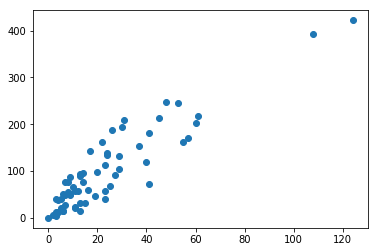

In [6]:
plt.scatter(data.values[:,0],data.values[:,1]);

In [7]:
data.corr()

,X,y
X,1.000000,0.912878
y,0.912878,1.000000


### Criação do dataset de validação 

In [8]:
dataset = data.values
print(dataset)

[[108.  392.5]
 [ 19.   46.2]
 [ 13.   15.7]
 [124.  422.2]
 [ 40.  119.4]
 [ 57.  170.9]
 [ 23.   56.9]
 [ 14.   77.5]
 [ 45.  214. ]
 [ 10.   65.3]
 [  5.   20.9]
 [ 48.  248.1]
 [ 11.   23.5]
 [ 23.   39.6]
 [  7.   48.8]
 [  2.    6.6]
 [ 24.  134.9]
 [  6.   50.9]
 [  3.    4.4]
 [ 23.  113. ]
 [  6.   14.8]
 [  9.   48.7]
 [  9.   52.1]
 [  3.   13.2]
 [ 29.  103.9]
 [  7.   77.5]
 [  4.   11.8]
 [ 20.   98.1]
 [  7.   27.9]
 [  4.   38.1]
 [  0.    0. ]
 [ 25.   69.2]
 [  6.   14.6]
 [  5.   40.3]
 [ 22.  161.5]
 [ 11.   57.2]
 [ 61.  217.6]
 [ 12.   58.1]
 [  4.   12.6]
 [ 16.   59.6]
 [ 13.   89.9]
 [ 60.  202.4]
 [ 41.  181.3]
 [ 37.  152.8]
 [ 55.  162.8]
 [ 41.   73.4]
 [ 11.   21.3]
 [ 27.   92.6]
 [  8.   76.1]
 [  3.   39.9]
 [ 17.  142.1]
 [ 13.   93. ]
 [ 13.   31.9]
 [ 15.   32.1]
 [  8.   55.6]
 [ 29.  133.3]
 [ 30.  194.5]
 [ 24.  137.9]
 [  9.   87.4]
 [ 31.  209.8]
 [ 14.   95.5]
 [ 53.  244.6]
 [ 26.  187.5]]


In [9]:
X = dataset[:,0:-1]
y = dataset[:,-1]
print (X.shape, y.shape)

(63, 1) (63,)


In [10]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,
                                                                    test_size=0.25, 
                                                                    shuffle = True, 
                                                                    random_state=42)
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((63, 1), (63,), (47, 1), (47,), (16, 1), (16,))

### Criação dos modelos

#### Classificadores utilizados:

- Linear Regression
- Linear SVR
- SVR - Epsilon-Support Vector Regression
- Random Forest Regressor
- Gradient Boosting Regressor
- Extra Tree Regressor

In [21]:
modelo = ensemble.GradientBoostingRegressor()
modelo.fit(X_train,y_train)
modelo.predict(X_train)

array([420.40162508,  28.43173107,  62.51237263, 214.80950217,
        86.56460718,  28.43173107, 123.04477551,  42.81509317,
        86.56460718,  38.49909838, 201.58578566,  62.51237263,
        75.44344034,   1.66438566,  61.66775596, 204.42720287,
         7.47080794,  93.27260833,  21.17917159, 103.79718942,
       128.71550029, 245.23807271,  28.43173107, 192.25632124,
       166.43302769,  54.40529182,  21.17917159,  98.77018746,
        54.09137905,  61.66775596,  49.44151018, 135.06643701,
        56.44749916,  42.81509317,   9.32898604,  49.44151018,
        28.43173107,  61.66775596,   9.32898604, 177.78001487,
        28.43173107,  68.33831922, 128.71550029,  38.22997064,
        38.22997064,  49.44151018,  21.17917159])

In [22]:
y_train

array([422.2,  50.9,  76.1, 214. ,  56.9,  40.3, 119.4,  21.3, 113. ,
        32.1, 202.4,  55.6,  69.2,   0. ,  87.4, 209.8,   6.6,  98.1,
        11.8, 103.9,  73.4, 248.1,  14.6, 194.5, 162.8,  58.1,  38.1,
        92.6,  46.2,  48.7,  15.7, 142.1,  59.6,  57.2,  13.2,  31.9,
        20.9,  52.1,   4.4, 187.5,  14.8,  77.5, 181.3,  48.8,  27.9,
        93. ,  12.6])

In [21]:
resultados = {}
resultados['LR'] = { 'model': linear_model.LinearRegression() }
resultados['LSVR'] = { 'model': svm.LinearSVR() }
resultados['SVR'] = { 'model': svm.SVR() }
resultados['RFR'] = { 'model': ensemble.RandomForestRegressor() }
resultados['GBR'] = {'model': ensemble.GradientBoostingRegressor()}
resultados['ETR'] = {'model': tree.ExtraTreeRegressor()}
resultados['KNN'] = {'model': neighbors.KNeighborsRegressor(n_neighbors=3)}

In [22]:
for key in resultados:
    print('processando {}...'.format(key))
    resultados[key]['model'].fit(X_train, y_train)
    resultados[key]['y_pred'] = resultados[key]['model'].predict(X_test)
    resultados[key]['mse'] = metrics.mean_squared_error(y_test, resultados[key]['y_pred'])
    resultados[key]['rmse'] = np.sqrt(resultados[key]['mse'])
    resultados[key]['mae'] = metrics.mean_absolute_error(y_test, resultados[key]['y_pred'])

processando LR...
processando LSVR...
processando SVR...
processando RFR...
processando GBR...
processando ETR...
processando KNN...


In [23]:
df = pd.DataFrame(resultados)
df.T[['y_pred','mse','rmse','mae']]

,y_pred,mse,rmse,mae
ETR,"[162.8, 84.95, 422.2, 209.8, 162.8, 202.4, 84....",1925.06,43.8756,38.6927
GBR,"[166.43302769178234, 86.56460718092951, 420.40...",1684.44,41.0419,35.4867
KNN,"[204.4333333333333, 79.7, 262.4666666666667, 1...",2674.27,51.7134,44.075
LR,"[198.3316951845612, 98.5410860287601, 387.5897...",1232.85,35.1119,30.3545
LSVR,"[186.67212705500202, 86.65580686354129, 376.35...",1693.61,41.1535,36.7142
RFR,"[179.25, 99.70750000000001, 352.3, 134.1650000...",1543.78,39.291,33.7364
SVR,"[57.761475001193524, 58.129477964690345, 57.74...",14217.2,119.236,86.932


In [24]:
df_T = df.transpose()
df_T = df_T[ ['rmse','mae'] ]
df_T

,rmse,mae
ETR,43.8756,38.6927
GBR,41.0419,35.4867
KNN,51.7134,44.075
LR,35.1119,30.3545
LSVR,41.1535,36.7142
RFR,39.291,33.7364
SVR,119.236,86.932


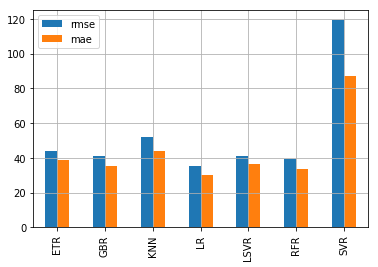

In [25]:
df_T.plot(kind='bar', grid=True);

In [17]:
modelo_final = linear_model.LinearRegression()
modelo_final.fit(X,y);

In [26]:
modelo_final.predict([[10],[20]])

array([54.13272136, 88.27095696])

In [28]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(modelo_final, open(filename, 'wb') )

In [29]:
loaded_model = pickle.load(open(filename, 'rb'))

In [30]:
loaded_model.predict([[10],[20]])

array([54.13272136, 88.27095696])